<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Data Science and Business Analytics</font></center>
<center><font size=6>Ensemble Techniques and Model Tuning</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

# **Problem Statement**

## Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


# **Importing necessary libraries**

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# **Loading the dataset**

In [3]:
path = r"C:\Data Science and Business Analytics WD\Ensemble Techniques and Model Tuning\Project 5_Ensemble Techniques and Modeling\EasyVisa.csv"
visa = pd.read_csv(path) ##  Fill the blank to read the data

In [5]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

# **Overview of the Dataset**

## View the first and last 5 rows of the dataset

In [7]:
data.head() ## top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
data.tail() ## last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Understand the shape of the dataset

In [11]:
data.shape ## dimensions of the data

(25480, 12)

## Check the data types of the columns for the dataset

In [779]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Checking for duplicate values

In [782]:
# checking for duplicate values
data.duplicated().sum() 

0

## Checking for missing values

In [785]:
data.isnull().sum()## check for missing values

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# <a name='link2'>**Exploratory Data Analysis (EDA)**</a>

#### Let's check the statistical summary of the data

In [791]:
data.describe()## statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [805]:
data.loc[data["no_of_employees"] < 0].shape

(33, 12)

* We will consider the 33 observations as data entry errors and take the absolute values for this column.

In [808]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [13]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts()) ## count of each unique value in each column
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [15]:
# checking the number of unique values
data["case_id"].nunique()

25480

In [17]:
data.drop(["case_id"], axis=1, inplace=True)

## Univariate Analysis

### Functions required for EDA

In [819]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [821]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on education of employee

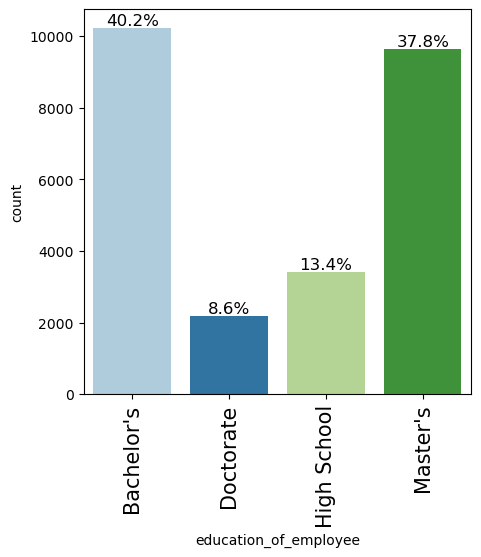

In [824]:
labeled_barplot(data, "education_of_employee", perc=True)

### Observations on region of employment

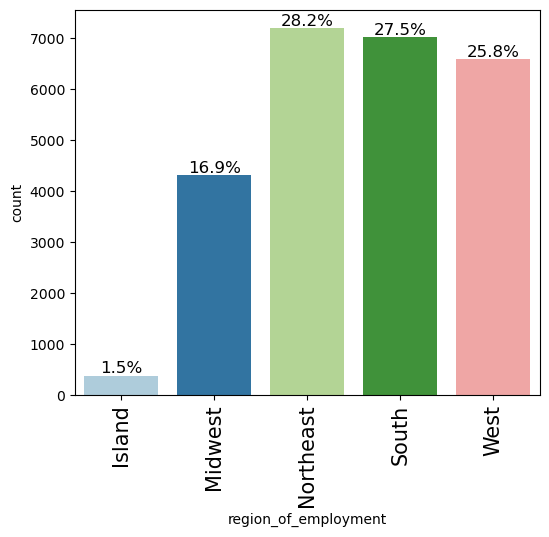

In [827]:
labeled_barplot(data, "region_of_employment", perc=True) ## labeled barplot for the region of employment column

### Observations on job experience

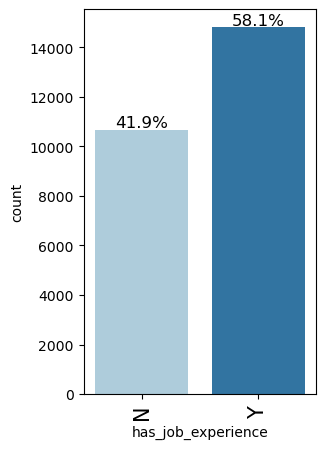

In [558]:
labeled_barplot(data, "has_job_experience", perc=True) ## labeled barplot for the job experience column

### Observations on no_of_employees

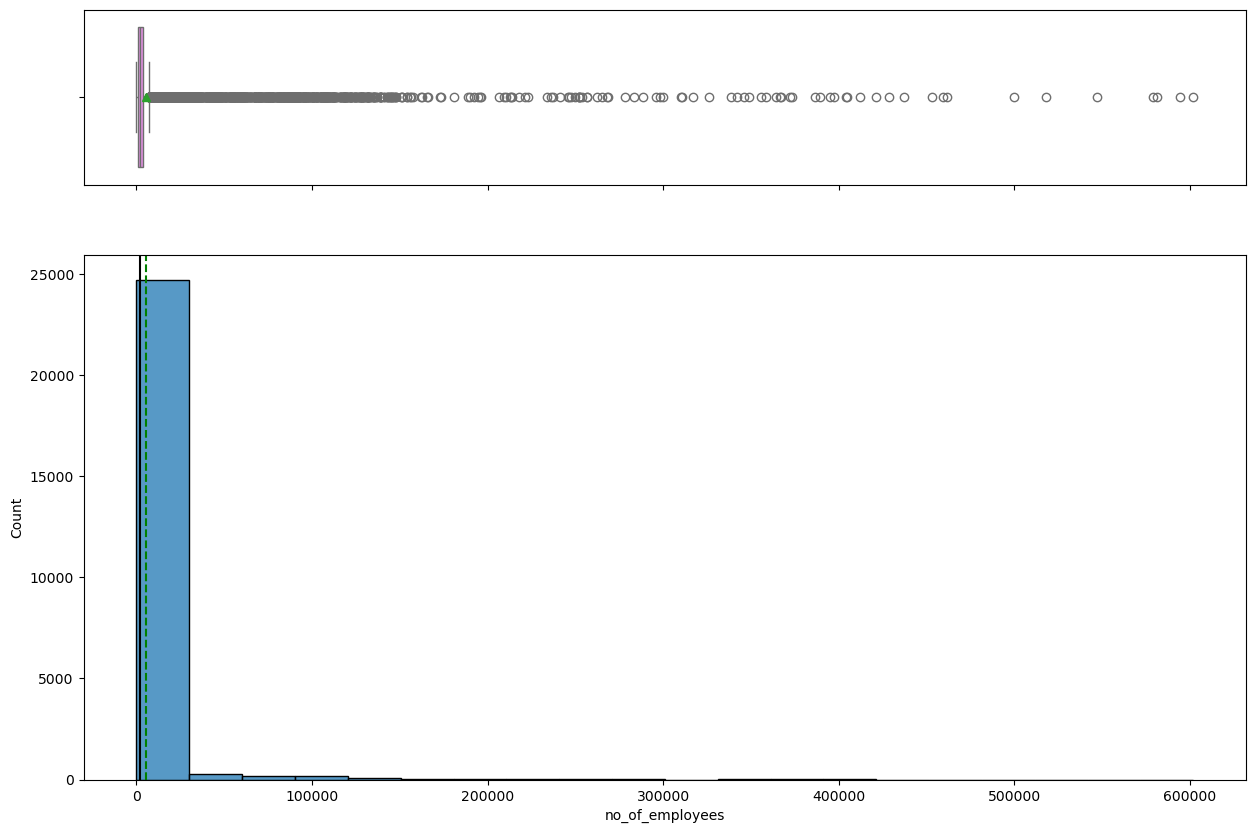

In [561]:
histogram_boxplot(data, 'no_of_employees', bins = 20)

### Observations on yr_of_estab

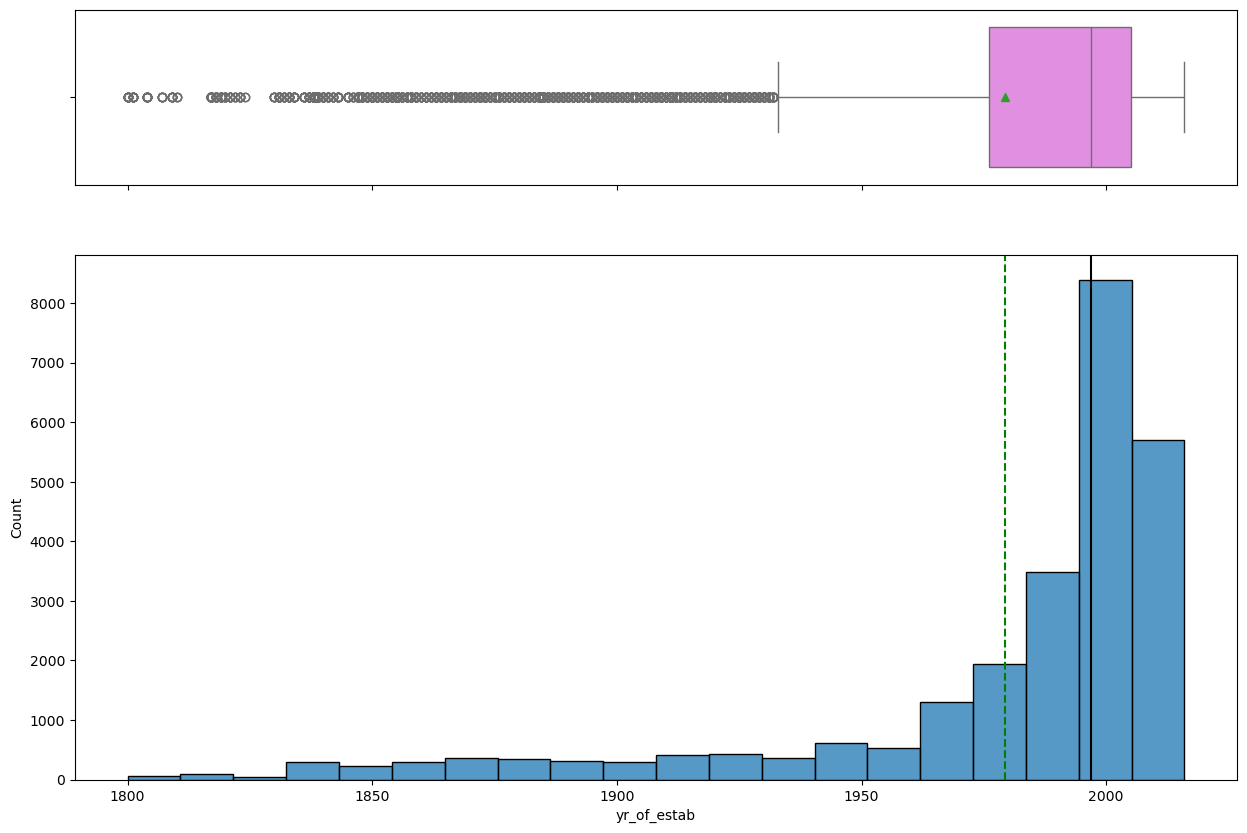

In [564]:
histogram_boxplot(data, 'yr_of_estab', bins = 20)  ## histogram and boxplot for the year of establishment column

### Observations on full_time_position

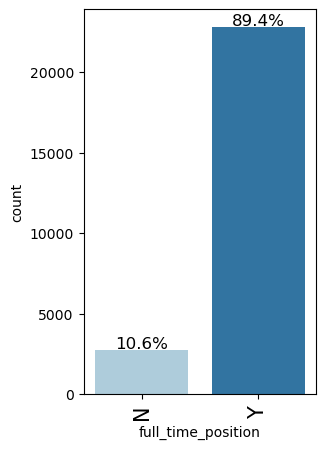

In [567]:
labeled_barplot(data, "full_time_position", perc=True) ## labeled barplot for the full time position column

### Observations on case status

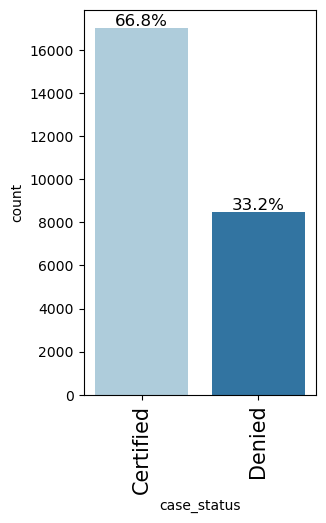

In [570]:
labeled_barplot(data, "case_status", perc=True) ## labeled barplot for the case status column

* 66.8% of the visas were certified.

## Bivariate Analysis

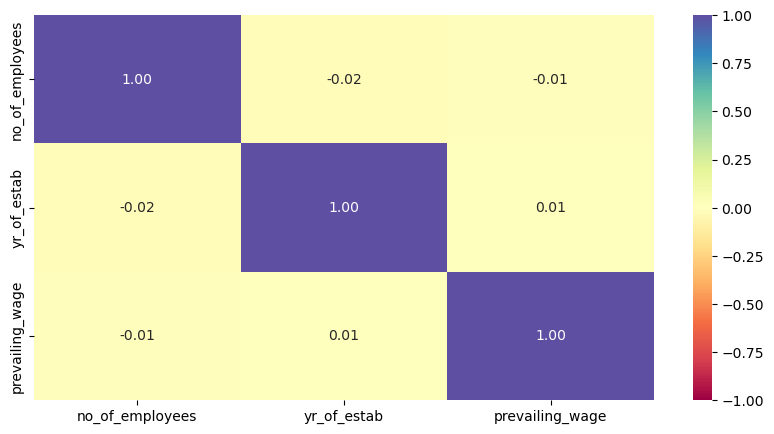

In [574]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Creating functions that will help us with further analysis.**

In [577]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [579]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


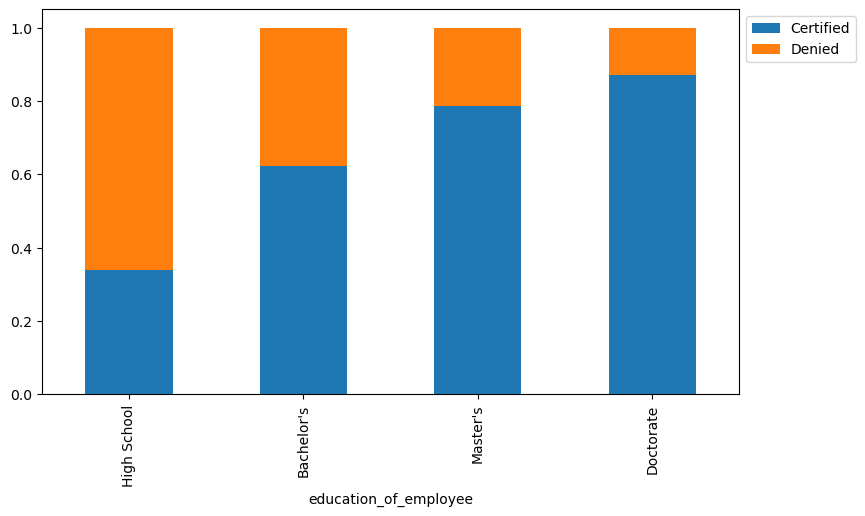

In [582]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


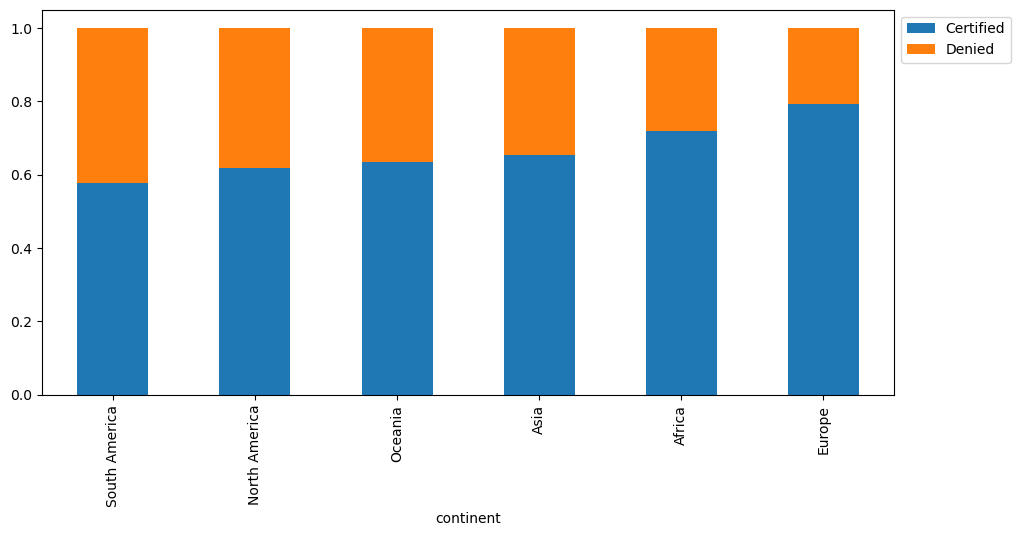

In [585]:
stacked_barplot(data, "continent", "case_status") ## stacked barplot for continent and case status

#### Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


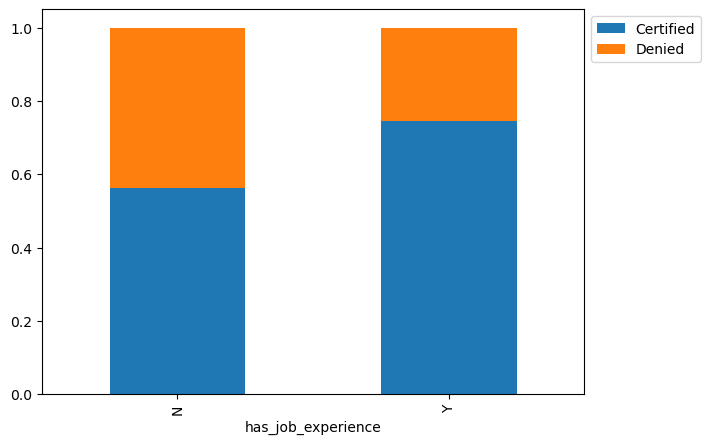

In [588]:
stacked_barplot(data, "has_job_experience", "case_status") ## stacked barplot for job experience and case status

#### Checking if the prevailing wage is similar across all the regions of the US

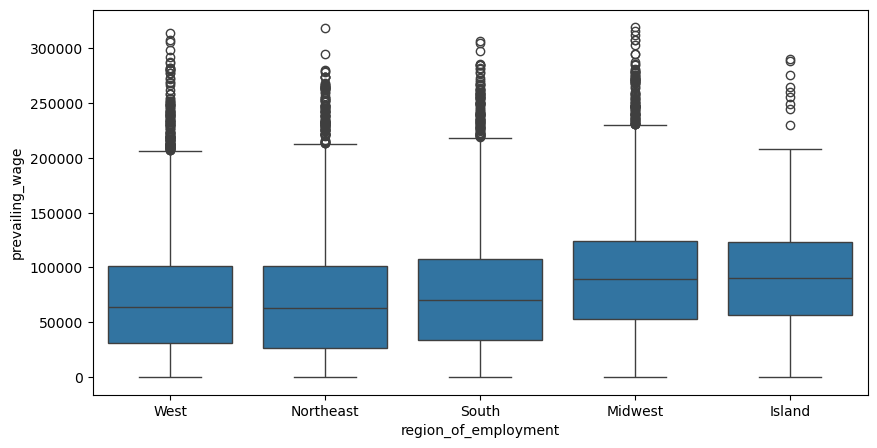

In [591]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

#### Let's analyze the data and see if the visa status changes with the prevailing wage

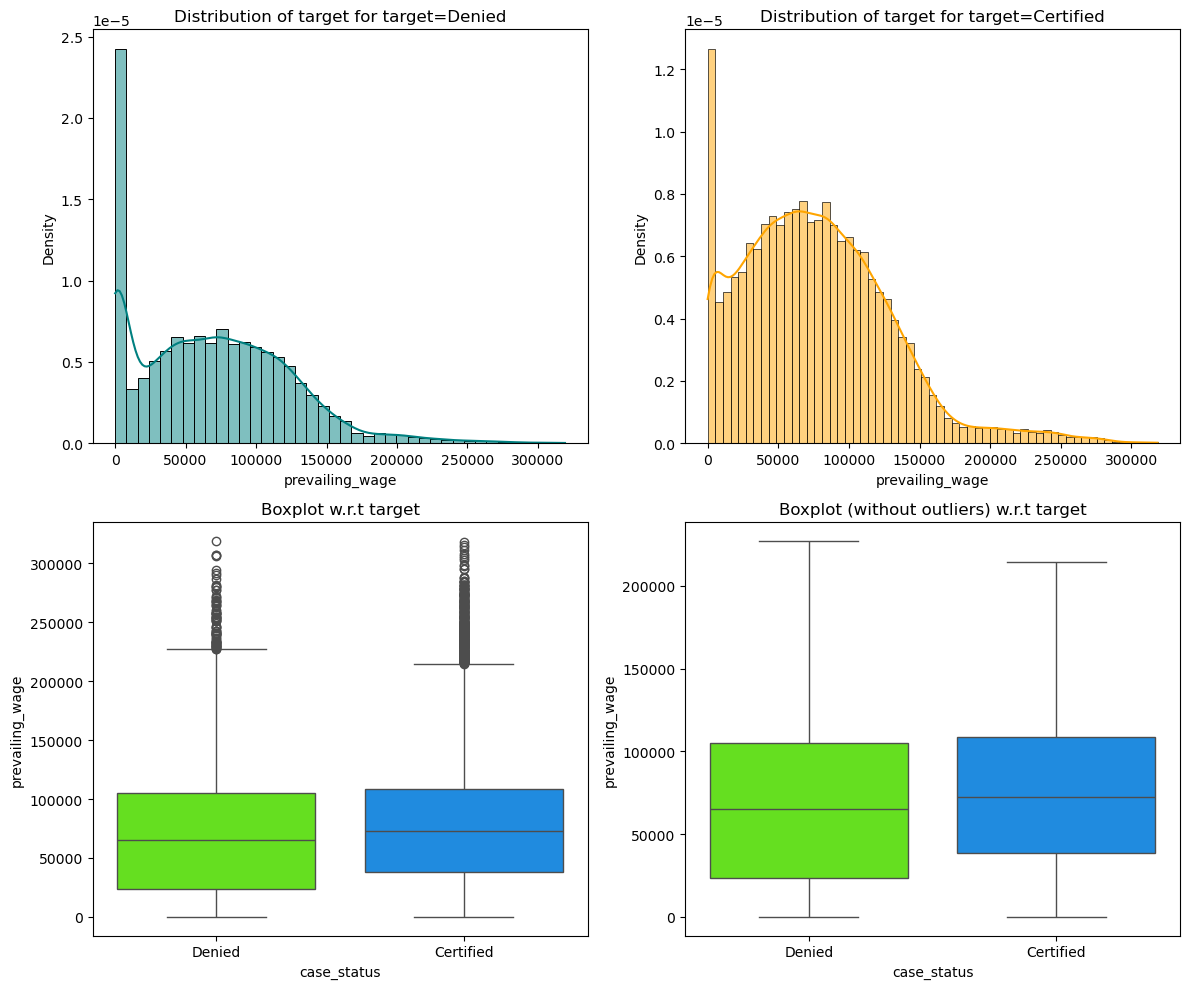

In [594]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### Observations on no_of_employees and case_status

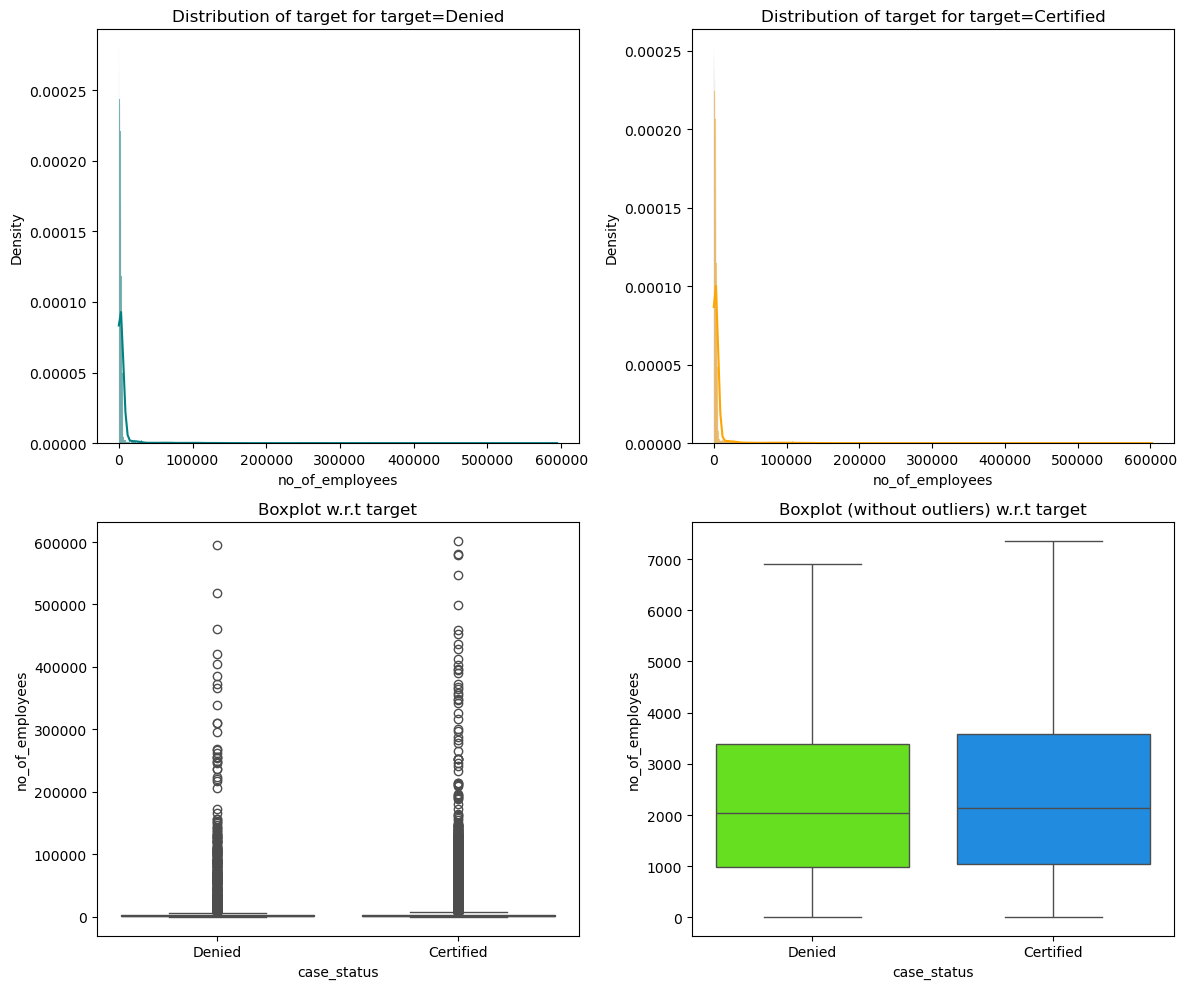

In [597]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")  ## distribution plot wrt target for no of employees and case status

#### Observations on yr_of_estab and case_status

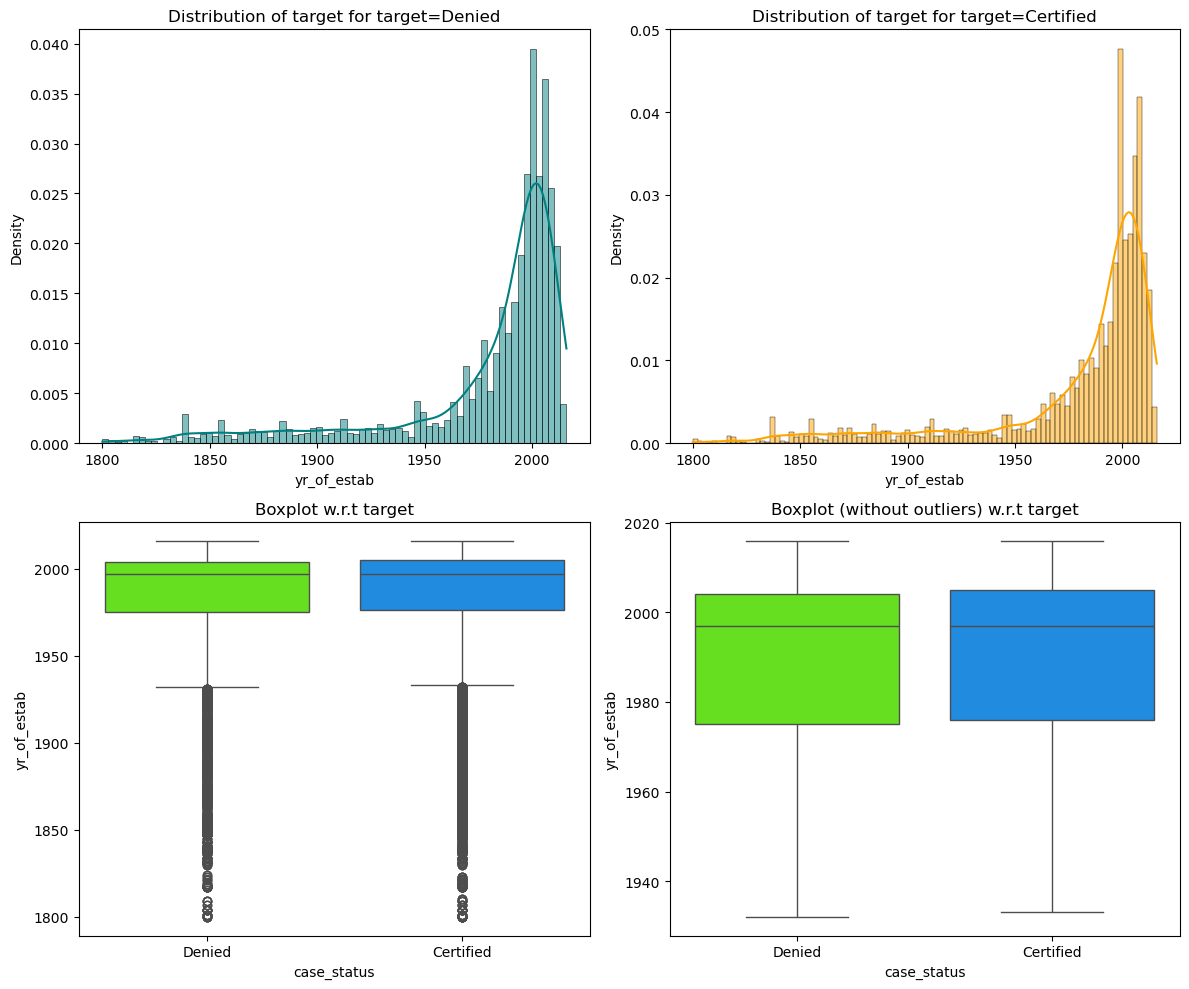

In [600]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")  ## distribution plot wrt target for year of establishment and case status

#### Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


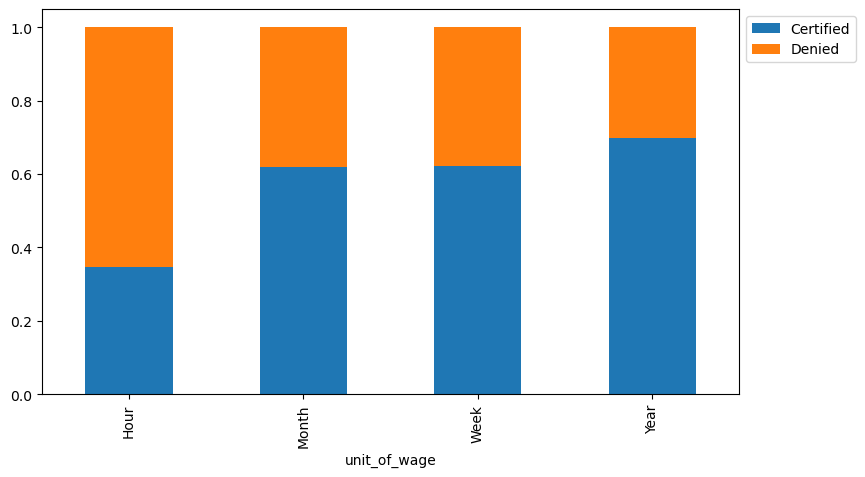

In [603]:
stacked_barplot(data, "unit_of_wage", "case_status")  ## stacked barplot for unit of wage and case status

#### Observations on full_time_position and case_status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


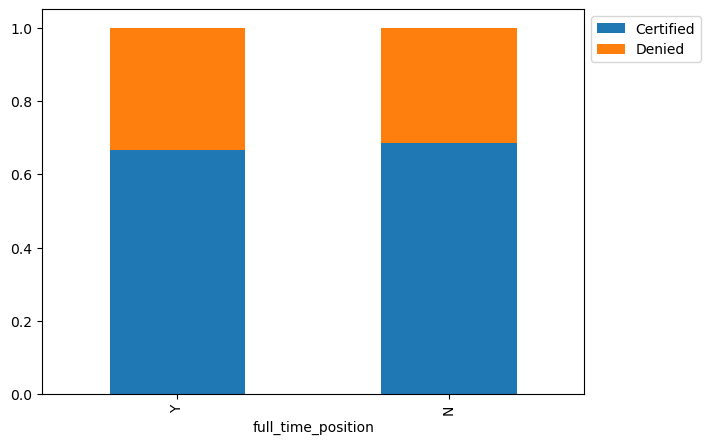

In [606]:
stacked_barplot(data, "full_time_position", "case_status")  ## stacked barplot for full time position and case status

# **Data Pre-processing**

### Outlier Check

- Let's check for outliers in the data.

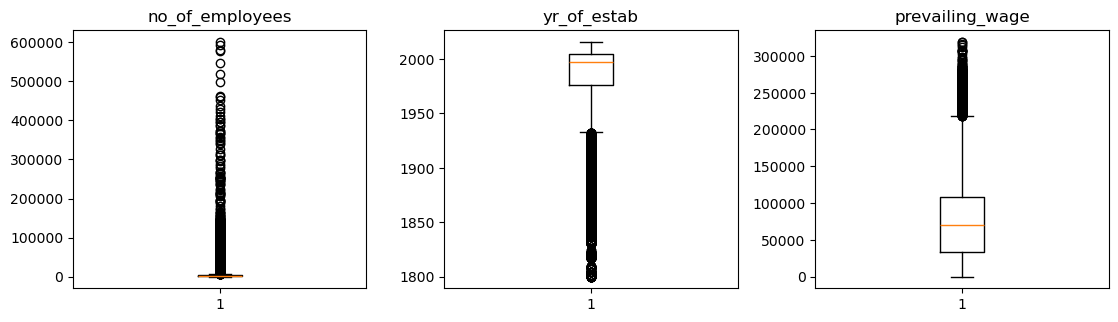

In [19]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [21]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1)
y = data["case_status"]


X = pd.get_dummies(X, drop_first=True)
# X = X.astype(float)

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

In [23]:
print("Shape of Training set : ", X_train.shape)
print("Shape of the Validation set: ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 21)
Shape of the Validation set:  (5096, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667975
0    0.332025
Name: proportion, dtype: float64


# **Model Building**

## Model evaluation criterion

**Model can make wrong predictions as**:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

**Which case is more important?**
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.


**How to reduce the losses?**

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [27]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building - Original Data

In [29]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight="balanced")))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))

## Append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.989150179193873
Random Forest: 1.0
Gradient Boosting: 0.8289261156490839
AdaBoost: 0.8193816669679985
XGBoost: 0.8956752478934873

Validation Performance:

Bagging: 0.7731761238025056
Random Forest: 0.8044975404075896
Gradient Boosting: 0.8263223656809663
AdaBoost: 0.8169205658324266
XGBoost: 0.8088665830196571


## Model Building - Oversampled Data

In [31]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [631]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1))) 
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))# append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))  ## build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875473741201949
Random Forest: 0.9999510260051913
Gradient Boosting: 0.8072434234901815
AdaBoost: 0.7980933870146698
XGBoost: 0.8708686342053813

Validation Performance:

Bagging: 0.7665171898355755
Random Forest: 0.7965442764578834
Gradient Boosting: 0.8173049645390071
AdaBoost: 0.8117746957260119
XGBoost: 0.8129304286718201


## Model Building - Undersampled Data

In [634]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [636]:
print("Before Under Sampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Certified': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Denied': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Certified': 10210
Before Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, counts of label 'Certified': 5078
After Under Sampling, counts of label 'Denied': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [638]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)))# append remaining 3 models in the list models ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))  ## build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9803687095166915
Random Forest: 1.0
Gradient Boosting: 0.7281441717791411
AdaBoost: 0.7051306873184898
XGBoost: 0.8720351390922401

Validation Performance:

Bagging: 0.7057046979865772
Random Forest: 0.7417218543046358
Gradient Boosting: 0.776595744680851
AdaBoost: 0.7619499841722064
XGBoost: 0.7459304181295883


# **Model Performance Improvement**

## **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```


## Hyperparameter Tuning - Random Forest

In [644]:
%%time
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

CPU times: total: 1.55 s
Wall time: 13.6 s


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=30,
                       oob_score=True, random_state=1)

### Checking model performance on training set

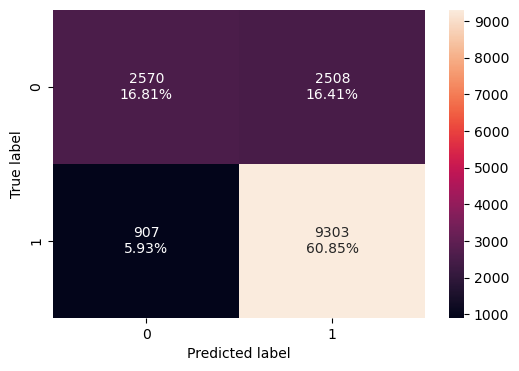

In [647]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [649]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.776622,0.911166,0.787656,0.844921


### Checking model performance on validation set

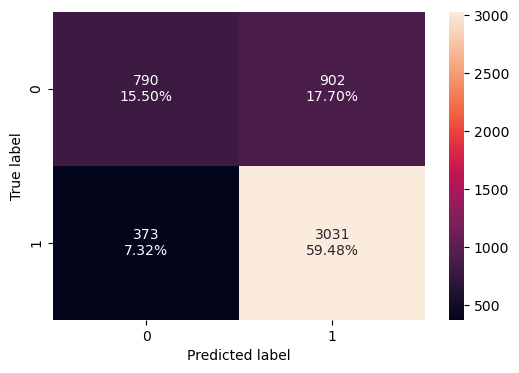

In [652]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

In [654]:
rf_tuned_model_val_perf = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
rf_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.749804,0.890423,0.770659,0.826223


## Hyperparameter Tuning - AdaBoost Classifier

In [657]:
%%time
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)  ## define the grid search object
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

CPU times: total: 1min 7s
Wall time: 1min 8s


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=75,
                   random_state=1)

### Checking model performance on training set

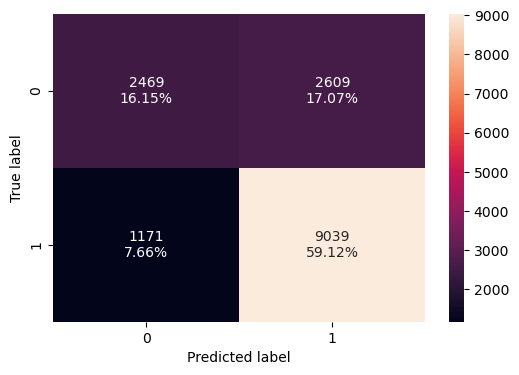

In [660]:
confusion_matrix_sklearn(abc_tuned,X_train, y_train) ## confusion matrix for the Adaboost Classifier on the training set

In [662]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)  ## perfromance metrics for the Adaboost Classifier on the training set
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.752747,0.885309,0.776013,0.827066


### Checking model performance on validation set

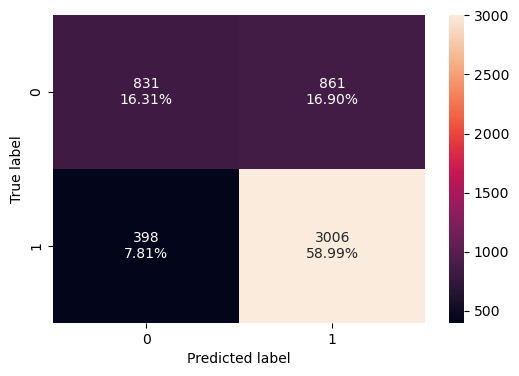

In [665]:
confusion_matrix_sklearn(abc_tuned, X_val, y_val)  ## confusion matrix for the Adaboost Classifier on the validation set

In [667]:
abc_tuned_model_val_perf = model_performance_classification_sklearn(abc_tuned, X_val, y_val)  ## perfromance metrics for the Adaboost Classifier on the validation set
abc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.752943,0.883079,0.777347,0.826846


## Hyperparameter Tuning - Gradient Boosting Classifier

In [671]:
%%time
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)  ## define the grid search object
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

CPU times: total: 6min 40s
Wall time: 6min 43s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.8, random_state=1,
                           subsample=0.7)

### Checking model performance on training set

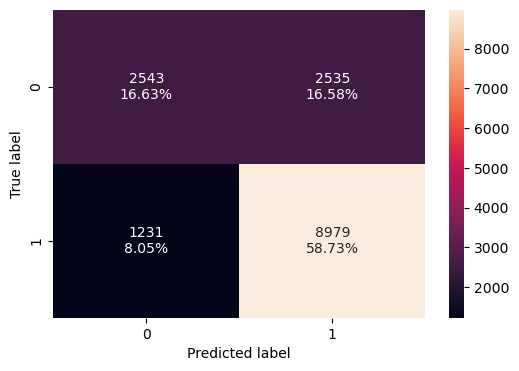

In [674]:
confusion_matrix_sklearn(gbc_tuned,X_train, y_train)  ## confusion matrix for the Gradient Boosting Classifier on the training set

In [676]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)  ## perfromance metrics for the Gradient Boosting Classifier on the training set
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753663,0.879432,0.779833,0.826643


### Checking model performance on validation set

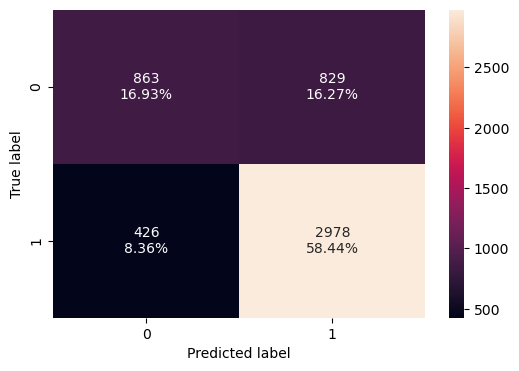

In [679]:
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)  ## confusion matrix for the Gradient Boosting Classifier on the validation set

In [681]:
gbc_tuned_model_val_perf = model_performance_classification_sklearn(
    gbc_tuned, X_val, y_val
)  ## perfromance metrics for the Gradient Boosting Classifier on the validation set
gbc_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.753728,0.874853,0.782243,0.82596


## Hyperparameter Tuning - XGBoost Classifier

In [684]:
%%time
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)  ## define the grid search object
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

CPU times: total: 13min 2s
Wall time: 1min 47s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### Checking model performance on training set

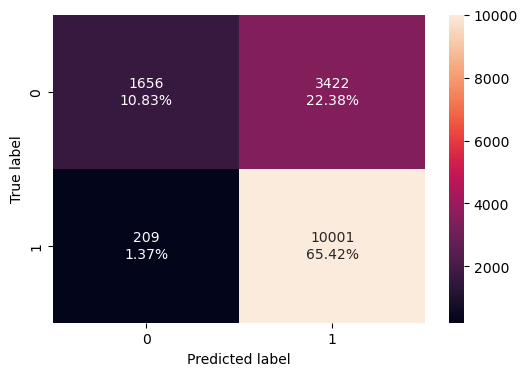

In [687]:
confusion_matrix_sklearn(xgb_tuned,X_train, y_train)  ## confusion matrix for the XGBoost Classifier on the training set

In [689]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned,X_train, y_train
)  ## perfromance metrics for the XGBoost Classifier on the training set
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.762493,0.97953,0.745064,0.846359


### Checking model performance on validation set

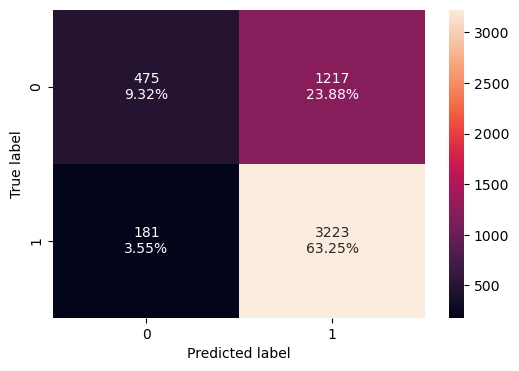

In [692]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)  ## confusion matrix for the XGBoost Classifier on the validation set

In [694]:
xgb_tuned_model_val_perf = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val
)  ## perfromance metrics for the XGBoost Classifier on the validation set
xgb_tuned_model_val_perf

,Accuracy,Recall,Precision,F1
0,0.725667,0.946827,0.725901,0.821775


# **Model Comparison and Final Model Selection**

## Comparing all models

In [724]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Training Performance Comparison:")
models_train_comp_df

Training Performance Comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.776622,0.752747,0.753663,0.762493
Recall,0.911166,0.885309,0.879432,0.979530
Precision,0.787656,0.776013,0.779833,0.745064
F1,0.844921,0.827066,0.826643,0.846359


In [726]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        rf_tuned_model_val_perf.T,
        abc_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Tuned Random Forest",
    "Tuned Adaboost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier Tuned",
]
print("Validation Performance Comparison:")
models_val_comp_df ## compare the performance on validation set

Validation Performance Comparison:


,Tuned Random Forest,Tuned Adaboost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier Tuned
Accuracy,0.749804,0.752943,0.753728,0.725667
Recall,0.890423,0.883079,0.874853,0.946827
Precision,0.770659,0.777347,0.782243,0.725901
F1,0.826223,0.826846,0.825960,0.821775


In [730]:
# Let's check the performance on the test set

# Make predictions
y_test_pred = abc_tuned.predict(X_test)

# Create dictionary of metrics
abc_test_perf = {
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'Precision': precision_score(y_test, y_test_pred),
    'F1': f1_score(y_test, y_test_pred)
}

# Convert to DataFrame (transpose to get metrics as rows)
abc_test_perf_df = pd.DataFrame(abc_test_perf, index=['Tuned Adaboost Classifier']).T

# Display the DataFrame
print("Test Performance Metrics on the Best Model:")
display(abc_test_perf_df)  # Use print() instead of display() if not in Jupyter

Test Performance Metrics on the Best Model:


,Tuned Adaboost Classifier
Accuracy,0.739796
Recall,0.881022
Precision,0.765051
F1,0.818951


In [852]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54      1692
           1       0.77      0.88      0.82      3404

    accuracy                           0.74      5096
   macro avg       0.71      0.67      0.68      5096
weighted avg       0.73      0.74      0.73      5096



## Important features of the final model

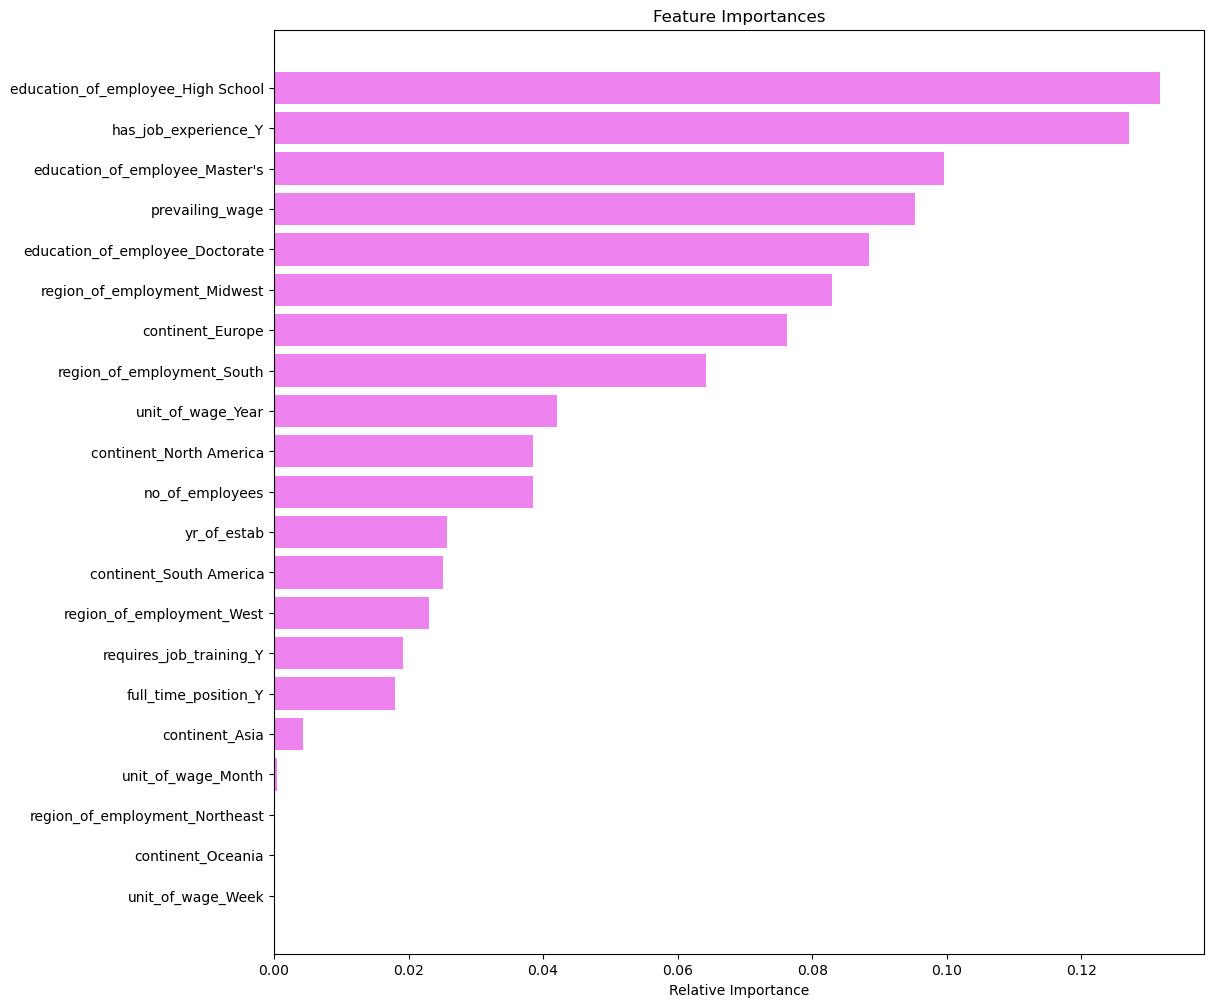

In [733]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_  ## feature importances of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# **Actionable Insights and Recommendations**



# Actionable Insights
1. Education is the top predictor of visa outcome
    Surprisingly, education_of_employee_High School is positively associated with visa approvals in the model.

    Master’s and Doctorate also contribute positively, but less than High School in relative importance.

    Interpretation: This might reflect certain job types where experience outweighs formal education (e.g., trades, skilled labor).

2. Work Experience is critical
    has_job_experience_Y ranks as the second most important feature.

    Candidates with prior job experience are more likely to receive visa approval.

    Employers should ensure clear documentation and emphasis on experience in their applications.

3. Wage Levels Matter
    prevailing_wage and unit_of_wage_Year are among the top features.

    Higher wages signal skill or scarcity and likely improve approval chances.

    Monthly and weekly wage units appear to reduce chances — standardizing offers to annual units may help.

4. Region and Continent of Employment & Origin Have Impact
    region_of_employment_Midwest, South, and West influence approvals — potentially due to regional labor shortages or economic needs.

    continent_Europe and North America appear positively related; Asia and Oceania show lower influence.

    Suggests geopolitical and economic relationships may subtly influence visa outcomes.

5. Company Size and Age Have Moderate Influence
    no_of_employees and yr_of_estab have mid-tier importance.

    Newer or smaller companies may face more scrutiny or rejections unless other factors (like wage and job experience) are very strong.

# Recommendations
OFLC should:

1. Focus manual reviews on borderline or low-probability cases, using the model to fast-track high-confidence approvals.

2. Use the model as a decision support tool, not a replacement for legal discretion.

3. Employers should:

    Highlight experience and wage competitiveness in applications.

    Consider offering salaries in annualized formats to standardize review.

    Be transparent about company history and headcount — this data plays a role.
   
4. Policy Makers may want to:

    Examine why High School education has such strong importance — is it bias in the data or a valid labor market signal?

    Investigate regional and continental disparities to ensure fair evaluation across geographies.

# Conclusion
The Tuned AdaBoost Classifier offers a reliable and interpretable model to assist in visa application decisions. With an F1 score of ~0.82 on the test set, it strikes a solid balance between identifying valid candidates and minimizing erroneous denials.

Its strongest predictors — education level, work experience, and prevailing wage — align with what economic theory and policy expect, making the model trustworthy for deployment in real-world visa screening workflows.



___